# Data Preparation
- Handling missing values
- Handling categorical features (review)

## Handling Missing Values

scikit_learn models expect that all values are **numeric** and **hold meaning**. As such, missing values are not allowed. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
#this allows plots to appear in the notebook
%matplotlib inline

path = '/Users/Joshua/Downloads/'
url = path + 'titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')

In [3]:
#check for missing vlaues 
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

One approach is to **drop missing values**

In [7]:
#the code below drops rows with any missing values
titanic.dropna().shape

(183, 11)

In [8]:
#you can also drop rows that meet certain criteria, here we drop rows where Age is missing
titanic[titanic.Age.notnull()].shape

(714, 11)

Often times its better to **impute missing values** rather than further reduce your sample size. 

In [10]:
#mean age
titanic.Age.mean()

29.69911764705882

In [11]:
#median Age 
titanic.Age.median()

28.0

In [15]:
#most frequent age
titanic.Age.mode()

0    24.0
dtype: float64

**Choice** of how you impute missing values can effect the results of your analysis look to prior work to check what kind of imputation is recommended or test and learn with different imputation strategies.

In [4]:
#fill missing values for Age with the median age 
titanic.Age.fillna(titanic.Age.median(), inplace=True)
#the 'inplace=True' means the dataframe is changed, and this change is persisted

## Handling categorical features (Review)

How do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

In [20]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
#create and encode female feature
titanic['Female'] = titanic.Sex.map({'male':0, 'female':1})

In [6]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
#create a DataFrame of dummy variables for Embarked
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

#concatenate the original DataFrame and the dummy DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [8]:
titanic.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,0,1


# The Bias-Variance Tradeoff


This is a [dataset](http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt) of the average weight of the body and the brain for 62 mammal species. Let's read it into pandas and take a quick look:

#### from [Scott Fortmann](http://scott.fortmann-roe.com/docs/BiasVariance.html)

- **Error due to Bias (validity):** The error due to bias is taken as the difference between the expected (or average) prediction of our model and the correct value which we are trying to predict. Of course you only have one model so talking about expected or average prediction values might seem a little strange. However, imagine you could repeat the whole model building process more than once: each time you gather new data and run a new analysis creating a new model. Due to randomness in the underlying data sets, the resulting models will have a range of predictions. Bias measures how far off in general these models' predictions are from the correct value.


- **Error due to Variance (reliability):** The error due to variance is taken as the variability of a model prediction for a given data point. Again, imagine you can repeat the entire model building process multiple times. The variance is how much the predictions for a given point vary between different realizations of the model.

In [25]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url='https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg')

In [20]:
url = 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt'
col_names = ['id', 'brain', 'body']
mammals = pd.read_table(url, sep='\s+', skiprows=33, names=col_names, index_col='id')

In [21]:
mammals.head()

,brain,body
id,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


In [11]:
mammals.describe()

,brain,body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [12]:
#let's focus on a smaller subset where the body weight is less than 200 lbs
mammals = mammals[mammals.body < 200]


In [13]:
mammals.shape


(51, 2)

In [14]:
mammals.describe()

,brain,body
count,51.000000,51.000000
mean,15.014098,40.810196
std,37.842178,58.105713
min,0.005000,0.140000
25%,0.352500,3.250000
50%,1.620000,12.100000
75%,4.261500,53.200000
max,192.000000,180.000000


Let's assume there are only 51 mammal species in existence. In essence, treat this a dataset of brains and body weight for **every known mammal species**.

Let's create a scatterplot (using [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/)) to visualize the relationship between brain and body weight:

(-10, 250)

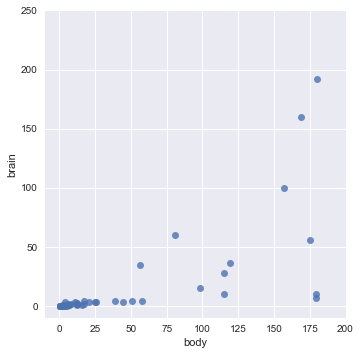

In [43]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, fit_reg=False)
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

There appears to be a relationship between brain and body weight for mammals

Now let's pretend that a **new mammal species** is discovered. We measure the body weight of every member of this species that we can find, and calculate an **average body weight of 100**. We want to **predict the average brain weight** of this species (rather than measuring it directly).

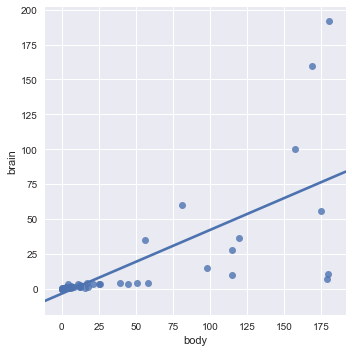

In [15]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, fit_reg=True)

We draw a straight line that best fits the relationship between brain and body weight. For this example, our prediction might be somewhere around 45, which is the approximate value of y when x = 100 

# Make a prediction based on a sample 

Recall that we said this dataset contained every known mammal species. That's a useful for an example like this but of course the real world is not like that all. In fact, **all you will ever have is a sample of data**. 
A more realistic situation would be to only have brain and body weights for some known mammals.

When that new mammal species (with a body weight of 100 is discovered, we still want to make an accurate prediction for the brain weight, but this task might be more difficult since we don't have all of the data that we would ideally like to have.

Let's simulate this situation by assigning each of the 51 observations to **either universe 1 or universe 2**:

In [16]:
#set a random seed for reproducibility 
np.random.seed(123)

#randomly assign every observatio nto either universe 1 or universe 2
mammals['universe'] = np.random.randint(1,3, len(mammals))

In [17]:
mammals.head()

,brain,body,universe
id,,,
1,3.385,44.5,1
2,0.480,15.5,2
3,1.350,8.1,1
5,36.330,119.5,1
6,27.660,115.0,1


For purposes of this exercise we can only live in 1 of the 2 universes. Both have 51 known mammal species, but each universe knows the brain and body weight for different species

(-10, 250)

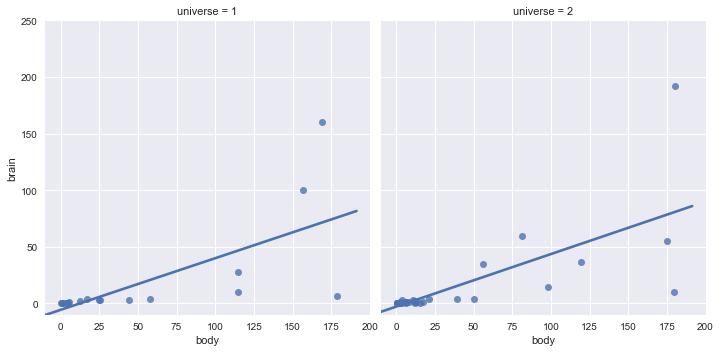

In [50]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe')
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)
#the col='universe'  creates 2 separate plots, by universe

Both of these plots seem to be about the same as we had before, we'd still predict a brain weight of approximatley 45 given a body weight of 100 lbs. 
It's easier to see how similar these plots are if we merge the two plots. 

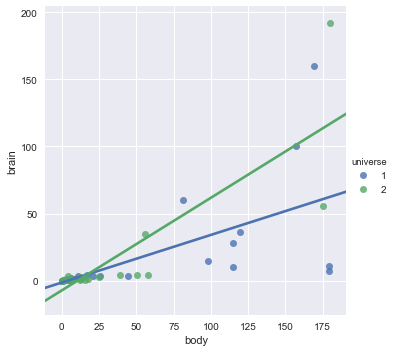

In [18]:
'''
instead of splitting into the 2 plots by the universe column, we can change the color of the lines by the universe column

'''sns.lmplot(x='body', y='brain', data=mammals, ci=None, hue='universe')

## What's the point? 
this illustrates a high bias, low variance model. 

- **High bias** because it doesn't fit the data particularly well.
- **Low variance** because it doesn't change much depending on which observations happen to be available in that universe.

# What about the reverse? 
What would a **low bias, high variance** model look like? Let's give polynomial regression a go, with an eighth order polynomial:

(-10, 250)

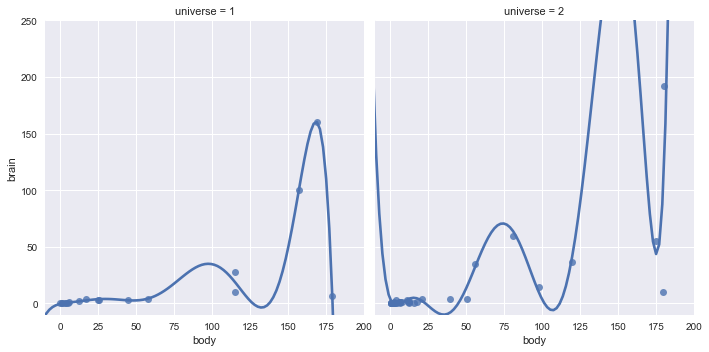

In [54]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe', order=8)
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

- The model fits the data exceedingly well, thus showing **low bias**
- However, the model has **high variance** because the models are widely different depending on which observations happen to be available in that universe. 
- This makes generlizations to out of sample data widely different, for example for a body weight of 100, the brain weight prediction would be 40 in one universe and 0 in the other universe)

# Let's try a middle ground
- Can we fit a model that still has less bias than the linear model but lower variance than the 8 order polynomial? 
- Since a lot of data in the real world is curvilinear but probably not to the level of an eigth order polynomial let's try a third order polynomial instead

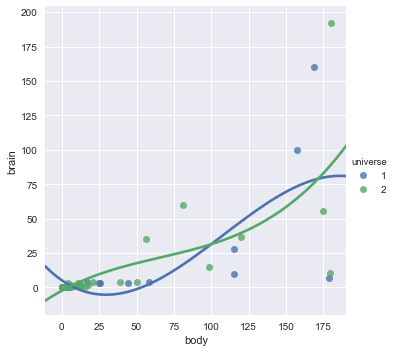

In [56]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, hue='universe', order=3)

This seems a better. The data isn't **overfitted** and the model could reasonably predict a new value in either universe. 

This is the essence of the **bias-variance tradeoff**. You need a model that fits your data well but can also generalize to new data.

# Model Evaluation

### Evaluating models, approach 1: Train and test on the ENTIRE dataset. 
1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

### For this exercise
- We will be using a data on NBA players from 2015
- we will use it for predicting the position of an unknown NBA player
    - We need a way to choose the **"best" model**: the one that "generalizes" to "out-of-sample" data

**Solution:** Create a procedure that **estimates** how well a model is likely to perform on out-of-sample data and use that to choose between models.

**Note:** These model evaluation procedures can be used with **any machine learning model**, although here we use KNN. 

In [28]:
path = '/Users/Joshua/Downloads/'
url = path + 'nba_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [35]:
#let's map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [36]:
#create a matrix of features/predictors/independent variables (X)
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]
print(X.shape)

(478, 5)


In [37]:
#create the outcome/lable/endogenous vector (y)
y = nba.pos_num
print(y.shape)

(478,)


In [38]:
#import the class
from sklearn.neighbors import KNeighborsClassifier

#instantiate the model 
knn = KNeighborsClassifier(n_neighbors=50)

#train the model on the entire data set 
knn.fit(X,y)

#predict the response values for the observations in X, our test of the model 
knn.predict(X)

array([1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 1,

In [39]:
#let's store the predicted values 
y_pred_class = knn.predict(X)

To evaluate a model, we also need an **evaluation metric:**

- Numeric calculation used to **quantify** the performance of a model
- Appropriate metric depends on the **goals** of your problem, recall our precision and recall discussion from earlier in the lecture. 

For ease of interpretation and simplicity let's use accuracy.

In [40]:
#accuracy
from sklearn import metrics
print metrics.accuracy_score(y,y_pred_class)

0.665271966527


This is **training accuracy**.  we are evaluating the model on the same data we used to train the model.

In [41]:
#let's try a k of 1 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred_class = knn.predict(X)
print metrics.accuracy_score(y,y_pred_class)

1.0


Of course, if our goal is predict a value given new data, doing training on the entire data set defeats the purpose. 
Because our model invariably learns the particulars of our sample which may or may not faithfull represent the population we are interested in. 
#### optimizing for training accuracy means our model learns more of the noise than the signal

# Approach 2: Train/test split
1. we "split" the data set into 2, one we call the **training set** and the **testing set**, this selection of training and testing of the data set is arbitrary. But once set, don't forget which set is which! 
2. Train the model on the **training set**. Here the model is optimized, taking care not to overfit it. 
3. And then, using new data aka our testing set of data, we can see how well our model performs on "new data" aka the **testing set**.

- This method allows models to be created and tested on different sets of data. 
- When creating a model for the test data set, we can obtain predicted values, which are known and use these to evaluate our good or not our predictions are. 

We call this **testing accuracy** because we are evaluating the model on an independent "test set" that was not used during model training.

**Testing accuracy is a better estimate of out-of-sample performance than training accuracy.**

#### The test_train_split function

In [42]:
from sklearn.model_selection import train_test_split
# step 1: split X and y into training testing sets, using the random_state parameter for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [43]:
# step 2: train the model on the training dataset, still using k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [44]:
# finally, step 3: test the model on the testing dataset and evaluate how accurate the model is,
#based on the model trained on the training dataset 

y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.616666666667


In [45]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.675


#### But how do we compare how "good" our model is? 
we can use a null model, the null model or h0 in NHST is the model evaluation metric score (in our case accuracy) that could be achieved by always predicting the most frequent class or the average class. Using the most frequent class or average class is our best guess of a new score without a statistical model.

Meaning, if you had predictor information but did not know the class, what is your best guess? The class that occurs the most or the average!

In [46]:
# examine the class distribution
y_test.value_counts()

2    60
1    49
0    11
Name: pos_num, dtype: int64

In [47]:
# compute null accuracy
y_test.value_counts().head(1) / len(y_test)

#conveniently it's 50%

2    0.5
Name: pos_num, dtype: float64

##### In summary, evaluating our model against the null model shows that our model does outperform a random flip of a coin...but could probaby be improved. 

## Iterating through a model to find the best value of K

In [48]:
#next we are going to calculte the training and testing error for k = 1 - 100, meaning values from 1 to 100

k_range = range(1,101) #101 because the range starts at 0! 
training_error = []
testing_error = []

#this is a loop that evaluates the model for values of k from 1 to 100
#the loop does it for us instead of having to do this by hand, nifty right? 

for k in k_range: 
    #instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #calculate the training error
    knn.fit(X,y)
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1-training_accuracy)
    
    #calculate error
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)
    
    
    

In [49]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') #sets the color scheme

In [50]:
# create a DataFrame of K, training error, and testing error
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=True)
df.head()

,testing error,training error
K,,
1,0.383333,0.000000
2,0.450000,0.184100
3,0.366667,0.190377
4,0.383333,0.221757
5,0.325000,0.251046


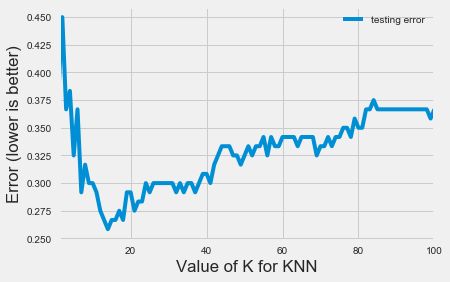

In [51]:
# plot the relationship between K (HIGH TO LOW) and TESTING ERROR
df.plot(y='testing error')
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

In [52]:
# find the minimum testing error and the associated K value
df.sort_values(by='testing error').head()

,testing error,training error
K,,
14,0.258333,0.286611
13,0.266667,0.282427
18,0.266667,0.284519
16,0.266667,0.282427
15,0.266667,0.284519


In [53]:
# alternative method
min(zip(testing_error, k_range))

(0.2583333333333333, 14)

CONCLUSIONS?
- for this sample with these features, the **best value for K** is  around 14.
- Given an **unknown player**, we could correctly predict his position about 74% of the time.

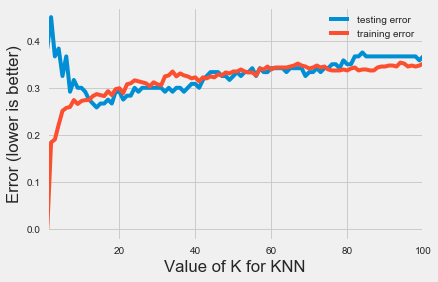

In [54]:
# plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR
df.plot()
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

- **Training error** decreases as model complexity increases (lower value of K)
- **Testing error** is minimized at the optimum model complexity

### Downsides of this the test/train split approach? 
- Testing accuracy has high variance for out of sample accuracy
- **K-fold cross-validation** overcomes this limitation and provides more reliable estimates
- But, train/test split is still useful because of its **flexibility and speed**

For instance, what if we split the data differently? 

In [55]:
# try different values for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.65


# Cross-validation
from Kevin Markum's sckikit-learn machine learning video class.

#### Cross-validation is conceptually running a bunch of test/train split evaluations and taking the average of those results. 
#### The key difference is that cross-validation is done systemically to ensure the test/train split evaluations aren't run on the same data.

#### Steps for K-fold cross-validation
1. Split the dataset into K equal partitions (or "folds").
2. Use fold 1 as the testing set and the union of the other folds as the training set.
3. Calculate testing accuracy.
4. Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
5. Use the average testing accuracy as the estimate of out-of-sample accuracy.

Diagram of 5-fold cross-validation:

In [56]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url='https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2015/01/bc81.png')

### Compare and contrast pros of cross-validation and test/train split

#### Pros of cross-validation: 
- better external validity, better out of sample prediction 
- can help you minimize data collection or tedious data cleaning processes by effeciently and effectively automating test/train splits and ensures no observation is used twice in testing or test 

#### Pros of test/train split: 
- runs faster, k-times faster to be exact


### Cross-validation Tips and Tricks
1. **K=10** is generally recommended
2. If used for classification, stratified sampling is recommended when using cross-validation. This helps ensure that each classification outcome is roughly in equal proporations in each of the folds. 
    - scikit-learn's `cross_val_score` function does this by default

### Cross-Validation Example: hyper-parameter tuning 
- We will use cross-validation  to select the best hyperparameters for KNN on the iris dataset

In [57]:
#lets load the modules we need 
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
#load the dataset
iris = load_iris()

#create predictors/features/independent variables and y (response/label/outcome variable)
X = iris.data
y = iris.target

In [59]:
#10-fold cross-validation with k=10 (the n_neighbors hyperparameter)
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') #cv is the cross-validation parameter
print(scores)

[ 1.          0.93333333  1.          1.          1.          0.86666667
  0.93333333  0.93333333  1.          1.        ]


In [60]:
# average accuracy used for an estimate of out-of-sample accuracy
print scores.mean()

0.966666666667


In [61]:
#Now, let's iterate through potential values of K to find an optimal value for our KNN model
k_range = range(1,101)

models = []

for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k)
    k_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    models.append(k_scores.mean())
print(models)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.94666666666666666, 0.94000000000000006, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.9333333333

#### Neat! We now have 100 different models (values of n_neighbors), all we have to do is look through the list and pick the one with the best accuracy. 

#### Ok, Stop! How do I know what the value of K is? 

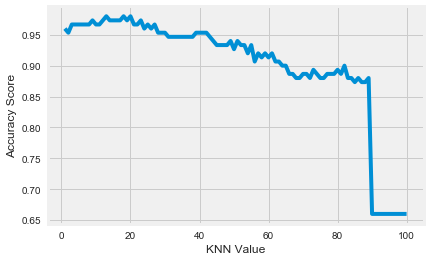

In [62]:
#let's plot the values to see more quickly what the best value is
plt.plot(k_range, models)
plt.xlabel('KNN Value')
plt.ylabel('Accuracy Score')

#### Aha! Now it's relatively easy to see the best value for the iris dataset is for a KNN model is with a K somewhere around 20

## Cross-validation for model selection
**Let's compare our KNN model/algorithm to another type of classification model/algorithm: logistic regression (still using the iris dataset).**

In [63]:
#from our work above we know the best value is somewhere around 20, let's validate that. 
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.98


In [64]:
#on to logistic regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
print(cross_val_score(log, X, y, cv=10, scoring='accuracy').mean())
log

0.953333333333


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Our model using KNN is better but using an out-of-the box logistic regression model from scikitlearn is almost as good. 
### Which one is best? Here is one take: [knn v logistic regression](https://pdfs.semanticscholar.org/24b0/2fc8b438d9a432ad72111ef2d80f8c148c1c.pdf)

## ROC Curves and AUC

In [65]:
#general imports and re-loading data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

path = '/Users/Joshua/Downloads/'
url = path + 'titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')

#handle missing values for age 
titanic.Age.fillna(titanic.Age.median(), inplace=True)

#dummy code male and female 
titanic['Female'] = titanic.Sex.map({'male':0, 'female':1})

#create dummy coded variables for the Embarked variable 
embarked_d = pd.get_dummies(titanic.Embarked, prefix='Embarked')

#pandas doesn't assume your reference group so we have to specify it
embarked_d.drop(embarked_d.columns[0], axis=1, inplace=True)

#add the dataframe with the dummy coded variables back to the original dataframe 
titanic = pd.concat([titanic, embarked_d], axis=1)



In [66]:
#define our independent and dependent variables 
features = ['Pclass', 'Parch', 'Age', 'Female', 'Embarked_Q', 'Embarked_S']
X = titanic[features]
y = titanic.Survived

#test/train split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#train and use a logistic regression model 
log = LogisticRegression(C=1e9)
log.fit(X_train, y_train)

#make out of sample predictions on the testing set 
y_pred_class = log.predict(X_test)

#calculate accuracy 
print(metrics.accuracy_score(y_test, y_pred_class))

0.793721973094


In [67]:
#lets look at the probabiliyt of survival
y_pred_prob = log.predict_proba(X_test)[:,1]
print(y_pred_prob)

[ 0.84499504  0.07452708  0.85089451  0.62517563  0.87679784  0.09611295
  0.13614005  0.90132984  0.61102777  0.62517563  0.08317149  0.54959651
  0.23484643  0.2085103   0.62517563  0.46288974  0.12124894  0.08625
  0.05536698  0.76839364  0.06428541  0.13712514  0.96264562  0.28153911
  0.77834389  0.0773126   0.96053548  0.67894176  0.22192028  0.93867627
  0.58852617  0.46288974  0.31911179  0.55940544  0.06763802  0.70196103
  0.38547214  0.07452708  0.63893875  0.09961842  0.53974887  0.49576482
  0.83854558  0.30077303  0.54048287  0.05748085  0.11708129  0.14545209
  0.54330931  0.2978782   0.32440973  0.82960052  0.27357712  0.16089292
  0.0718341   0.5691682   0.20203282  0.18860399  0.03240121  0.60761398
  0.48584129  0.12799618  0.19433808  0.30496503  0.47277553  0.62339656
  0.15587331  0.13712514  0.7434383   0.11735727  0.08625     0.11391555
  0.43459569  0.07452708  0.53824515  0.2807302   0.90132984  0.10648203
  0.3230848   0.95104021  0.08019322  0.06324444  0.07

In [68]:
#set up graph size and font size
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 15

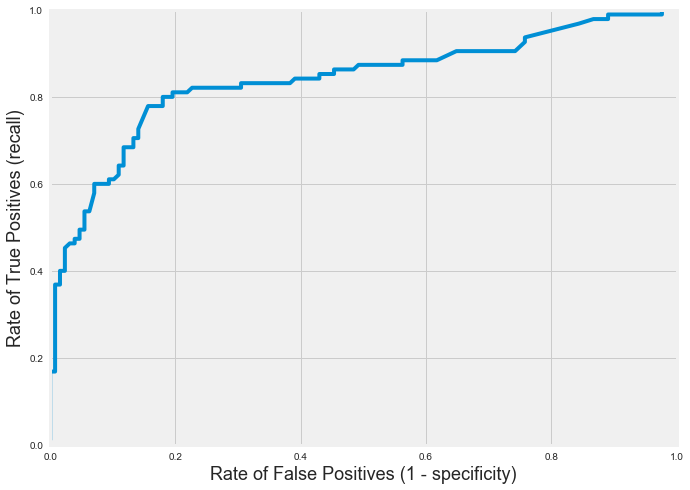

In [69]:
#plot the ROC curve 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Rate of False Positives (1 - specificity)')
plt.ylabel('Rate of True Positives (recall)')


#tn = true negative 
#tp = true positive 
#fp = false positive
#fn false negative

#precision = TP/(TP + FP)
#recall/ = TP /(TP + FN)
#specificity = TN/(TN + FP)





In [70]:
#calcualte area under the curve (AUC)
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.838692434211


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f4c5e90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11720bed0>], dtype=object)

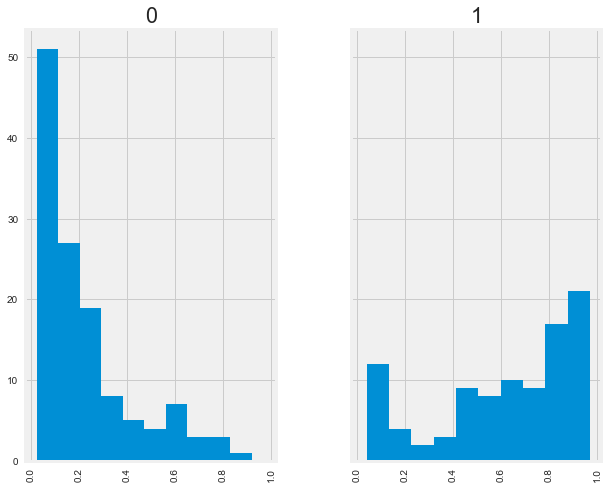

In [71]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':y_pred_prob, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)